In [1]:
from PIL import Image
from os import walk
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab
import matplotlib.cm as cm
import matplotlib
import cv2
from sklearn.decomposition import PCA
%matplotlib inline


In [2]:

path = "/home/pf/pfshare/data/MA_Rajanie/Data/Lake_Ice_Dataset_16-17/Moritz/aug/aug_raw"
f = []
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)
    break

In [ ]:
CHANNEL_NUM = 3
pixel_num = 0
x = []
channel_sum = np.zeros(CHANNEL_NUM)
for file in f:
    image = cv2.imread(os.path.join(path, file))
    x = np.concatenate([np.asarray(image)])

train_mean = np.mean(x, axis=(0, 1))
sum_1 = np.sum(train_mean)

print(train_mean)

In [4]:


path = "/home/pf/pfshare/data/MA_Rajanie/Data/Lake_Ice_Dataset_16-17/Moritz/aug/aug_raw"
f = []
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)
    break
# print(f)
# print(f_images)

In [ ]:
background = 0
water = 0
ice = 0
snow = 0
clutter = 0
labels = []
for file in f:
    im = Image.open(os.path.join(path, file), "r")
    pix_val = list(im.getdata())
    for pixel in pix_val:
        if pixel == 0:
            background += 1
            labels.append(0)
        elif pixel == 1:
            water +=1 
            labels.append(1)
        elif pixel == 2:
            ice += 1
            labels.append(2)
        elif pixel == 3:
            snow += 1
            labels.append(3)
        elif pixel == 4:
            clutter += 1
            labels.append(4)
y = np.asarray(labels)
print(y.shape)

In [ ]:
total = background + water + ice + snow + clutter


print("Percentage of pixels which belong to background: ",background/total)
print("Percentage of pixels which belong to water:      ",water/total)
print("Percentage of pixels which belong to ice:        ",ice/total)
print("Percentage of pixels which belong to snow:       ",snow/total)
print("Percentage of pixels which belong to clutter:    ",clutter/total)

#### Cam1

In [12]:
total = background + water + ice + snow + clutter


print("Percentage of pixels which belong to background: ",background/total)
print("Percentage of pixels which belong to water:      ",water/total)
print("Percentage of pixels which belong to ice:        ",ice/total)
print("Percentage of pixels which belong to snow:       " ,snow/total)
print("Percentage of pixels which belong to clutter:    ",clutter/total)


##weights
#print("weight : background: ",1/(background/total))
print("weight : water:      ",1/(water/total))
print("weight : ice:        ",1/(ice/total))
print("weight : snow:       ",1/(snow/total))
print("weight : clutter:    ",1/(clutter/total))

Percentage of pixels which belong to background:  0.0
Percentage of pixels which belong to water:       0.4747110431477175
Percentage of pixels which belong to ice:         0.0874304011716681
Percentage of pixels which belong to snow:        0.35591780775684423
Percentage of pixels which belong to clutter:     0.0819407479237702
weight : water:       2.1065446326447193
weight : ice:         11.437669124227362
weight : snow:        2.8096374449552117
weight : clutter:     12.20394035126826


### Cam0

In [9]:
total_1 = background_1 + water_1 + ice_1 + snow_1 + clutter_1


print("Percentage of pixels which belong to background: ",background_1/total_1)
print("Percentage of pixels which belong to water:      ",water_1/total_1)
print("Percentage of pixels which belong to ice:        ",ice_1/total_1)
print("Percentage of pixels which belong to snow:       ",snow_1/total_1)
print("Percentage of pixels which belong to clutter:    ",clutter_1/total_1)

##weights
print("Percentage of pixels which belong to background: ",1/(background_1/total_1))
print("Percentage of pixels which belong to water:      ",1/(water_1/total_1))
print("Percentage of pixels which belong to ice:        ",1/(ice_1/total_1))
print("Percentage of pixels which belong to snow:       ",1/(snow_1/total_1))
print("Percentage of pixels which belong to clutter:    ",1/(clutter_1/total_1))

Percentage of pixels which belong to background:  0.3195963464397738
Percentage of pixels which belong to water:       0.4479897511405032
Percentage of pixels which belong to ice:         0.0800234392735082
Percentage of pixels which belong to snow:        0.14870102683722755
Percentage of pixels which belong to clutter:     0.003689436308987208
Percentage of pixels which belong to background:  3.1289469079974124
Percentage of pixels which belong to water:       2.2321939228613505
Percentage of pixels which belong to ice:         12.496338686246023
Percentage of pixels which belong to snow:        6.724903124540148
Percentage of pixels which belong to clutter:     271.044115211874


In [ ]:
Percentage of pixels which belong to background:  0.0
Percentage of pixels which belong to water:       0.4747110431477175
Percentage of pixels which belong to ice:         0.0874304011716681
Percentage of pixels which belong to snow:        0.35591780775684423
Percentage of pixels which belong to clutter:     0.0819407479237702
        
Percentage of pixels which belong to background:  0.3195963464397738
Percentage of pixels which belong to water:       0.4479897511405032
Percentage of pixels which belong to ice:         0.0800234392735082
Percentage of pixels which belong to snow:        0.14870102683722755
Percentage of pixels which belong to clutter:     0.003689436308987208

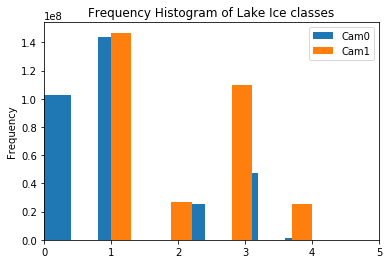

In [26]:
kwargs = dict(alpha=0.5, bins=100)

plt.hist(labels, label="Cam0")
plt.hist(labels_1, label="Cam1")
plt.gca().set(title='Frequency Histogram of Lake Ice classes', ylabel='Frequency')
plt.xlim(0,5)
plt.legend()
plt.show()



### Histogram for class distribution

### VISUALIZATION

In [11]:
images = []
for file in f_images:
    im = Image.open(os.path.join(path_images, file), "r")
    images.append(np.array(im))
    
images = np.asarray(images)
print(images.shape)
    

(820, 324, 1209, 3)


In [12]:
y_labels = []
for file in f:
    im = Image.open(os.path.join(path, file), "r")
    rgb_im = im.convert('RGB')
    y_labels.append(np.array(rgb_im))
y_labels = np.asarray(y_labels)
print(y_labels.shape)

(820, 324, 1209, 3)


In [13]:
features = images.reshape(820*324*1209*3,1)
print(features.shape)
y_labels = y_labels.reshape(820*324*1209*3,1)

print(y_labels.shape)

(963621360, 1)
(963621360, 1)


In [ ]:
plt.plot(features, y_labels, 'o', color='black');

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('ocean', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [ ]:


# load decomposition to do PCA analysis with sklearn

features = images.reshape(len(images),324*1209*3)
Y_my = labels
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features)
label_color_dict = {label:idx for idx,label in enumerate(np.unique(Y_my))}

# Color vector creation
cvec = [label_color_dict[label] for label in Y_my]
colors = ['red','green','blue','yellow', 'black']
plt.figure(figsize=(8,8))
plt.scatter(features_pca[:,0], features_pca[:,1],
            c=cvec, edgecolor='', alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors))


# Add the axis labels
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 

# Done
plt.show()

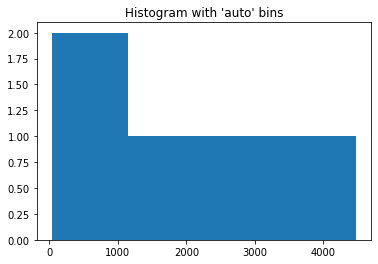

In [10]:
import matplotlib.pyplot as plt
#rng = np.array([3195, 4479, 800, 1487, 36])
a = np.hstack([3195, 4479, 800, 1487, 36])
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()
